In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/prices-split-adjusted.csv', header = 0)

In [5]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
df.shape

(851264, 7)

In [7]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [8]:
df_yahoo = df[df['symbol']=='YHOO']

In [9]:
df_yahoo.head()

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [10]:
df_yahoo.shape

(1762, 7)

In [11]:
df_yahoo.describe()


,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [13]:
df_yahoo.isnull().sum()


date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
 df_yahoo['date']= pd.to_datetime(df_yahoo['date'])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
print(df_yahoo.date.dtype)

datetime64[ns]


In [17]:
df_yahoo = df_yahoo.set_index("date")

In [18]:
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [22]:
print(df_yahoo.shape)

(1762, 6)


In [23]:
yahoo_data = df_yahoo.asfreq('b')

In [24]:
print(yahoo_data.shape)

(1825, 6)


In [25]:
yahoo_data.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0
2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0


In [26]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [30]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]

In [31]:
null_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
null_dates=null_data.index.tolist()

In [37]:
print(null_dates)

[Timestamp('2010-01-18 00:00:00'), Timestamp('2010-02-15 00:00:00'), Timestamp('2010-04-02 00:00:00'), Timestamp('2010-05-31 00:00:00'), Timestamp('2010-07-05 00:00:00'), Timestamp('2010-09-06 00:00:00'), Timestamp('2010-11-25 00:00:00'), Timestamp('2010-12-24 00:00:00'), Timestamp('2011-01-17 00:00:00'), Timestamp('2011-02-21 00:00:00'), Timestamp('2011-04-22 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-07-04 00:00:00'), Timestamp('2011-09-05 00:00:00'), Timestamp('2011-11-24 00:00:00'), Timestamp('2011-12-26 00:00:00'), Timestamp('2012-01-02 00:00:00'), Timestamp('2012-01-16 00:00:00'), Timestamp('2012-02-20 00:00:00'), Timestamp('2012-04-06 00:00:00'), Timestamp('2012-05-28 00:00:00'), Timestamp('2012-07-04 00:00:00'), Timestamp('2012-09-03 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00'), Timestamp('2012-11-22 00:00:00'), Timestamp('2012-12-25 00:00:00'), Timestamp('2013-01-01 00:00:00'), Timestamp('2013-01-21 00:00:00'), Timestamp('20

In [38]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [42]:
print(yahoo_data.shape)

(1825, 6)


In [52]:
modified_df= yahoo_data.drop(holidays)

In [53]:
print(modified_df.shape)

(1764, 6)


In [54]:
print("Before filling missing values:\n", modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64


In [55]:
modified_df = modified_df.bfill(axis ='rows')

In [56]:
print("\nAfter filling missing values:\n",modified_df.isna().sum())


After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


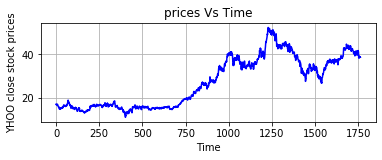

In [59]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

In [63]:
closing_stock.min()

11.09

In [64]:
closing_stock.max()

52.37

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [73]:
stocks = scaler.fit_transform(closing_stock)

In [74]:
print(stocks.min())
print(stocks.max())

0.0
0.99999994


In [78]:
n_train = int(len(stocks) * 0.80)
n_remaining = len(stocks) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 1411 Validation Samples: 176 Test Samples: 177


In [79]:
train = stocks[0:n_train]
print(train.shape)

(1411, 1)


In [80]:
val= stocks[n_train:n_train+n_val]
print(val.shape)

(176, 1)


In [81]:
test= stocks[n_train+n_val:]
print(test.shape)

(177, 1)


In [86]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [87]:
n_features = 2

In [88]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [89]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [90]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [91]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


In [99]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [104]:
model = keras.sequential()

AttributeError: module 'tensorflow_core.python.keras.api._v2.keras' has no attribute 'sequential'